In [2]:
import math
import random

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline 

In [90]:
gm = pd.read_csv('https://raw.githubusercontent.com/dlab-berkeley/visualization-with-python/master/data/gapminder.tsv', sep='\t')


gm

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333.0,779.445314
1,Afghanistan,Asia,1957,30.332,9240934.0,820.853030
2,Afghanistan,Asia,1962,31.997,10267083.0,853.100710
3,Afghanistan,Asia,1967,34.020,11537966.0,836.197138
4,Afghanistan,Asia,1972,36.088,13079460.0,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418.0,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340.0,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948.0,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563.0,672.038623


In [7]:
gm.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333.0,779.445314
1,Afghanistan,Asia,1957,30.332,9240934.0,820.853030
2,Afghanistan,Asia,1962,31.997,10267083.0,853.100710
3,Afghanistan,Asia,1967,34.020,11537966.0,836.197138
4,Afghanistan,Asia,1972,36.088,13079460.0,739.981106


In [8]:
latest_year = gm['year'].max()
latest_year

2007

In [9]:
gm_latest = gm[gm['year']==latest_year]
gm_latest.shape

(142, 6)

In [10]:
gm_latest['gdpPercap'].describe()

count      142.000000
mean     11680.071820
std      12859.937337
min        277.551859
25%       1624.842248
50%       6124.371109
75%      18008.835640
max      49357.190170
Name: gdpPercap, dtype: float64

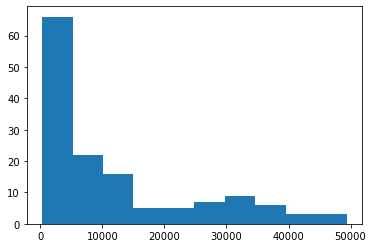

In [11]:
plt.hist(gm_latest['gdpPercap']);

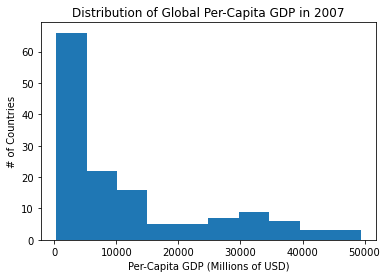

In [12]:
plt.hist(gm_latest['gdpPercap']);
plt.title('Distribution of Global Per-Capita GDP in 2007')
plt.xlabel('Per-Capita GDP (Millions of USD)')
plt.ylabel('# of Countries');

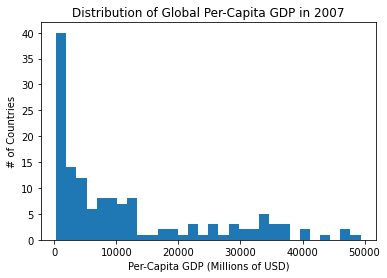

In [13]:
plt.hist(gm_latest['gdpPercap'], bins=30);
plt.title('Distribution of Global Per-Capita GDP in 2007')
plt.xlabel('Per-Capita GDP (Millions of USD)')
plt.ylabel('# of Countries');

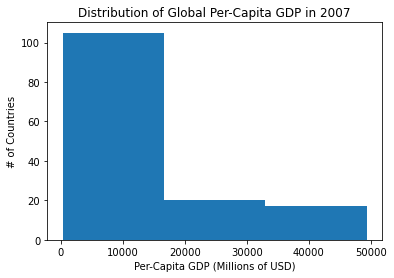

In [14]:
plt.hist(gm_latest['gdpPercap'], bins=3);
plt.title('Distribution of Global Per-Capita GDP in 2007')
plt.xlabel('Per-Capita GDP (Millions of USD)')
plt.ylabel('# of Countries');

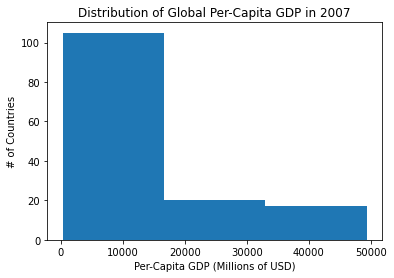

In [15]:
plt.title('Distribution of Global Per-Capita GDP in 2007')
plt.xlabel('Per-Capita GDP (Millions of USD)')
plt.hist(gm_latest['gdpPercap'], bins=3);
plt.ylabel('# of Countries');

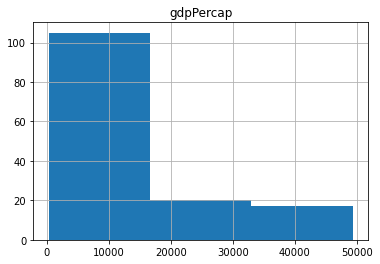

In [16]:
gm_latest.hist(column='gdpPercap', bins=3);
#title='Distribution of Global Per-Capita GDP in 2007',
#               xlabel='Per-Capita GDP (Millions of USD)',
#               ylabel='# of Countries')

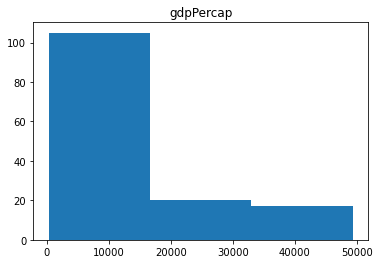

In [17]:
gm_latest.hist(column='gdpPercap', bins=3, grid=False);
#title='Distribution of Global Per-Capita GDP in 2007',
#               xlabel='Per-Capita GDP (Millions of USD)',
#               ylabel='# of Countries')

Text(0, 0.5, '# of Countries')

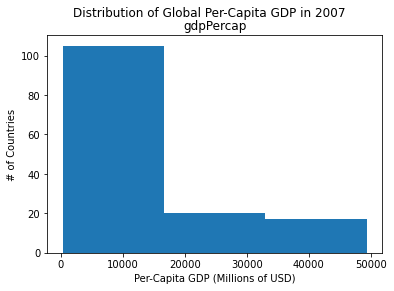

In [18]:
gm_latest.hist(column='gdpPercap', bins=3, grid=False);
plt.suptitle('Distribution of Global Per-Capita GDP in 2007')
plt.xlabel('Per-Capita GDP (Millions of USD)')
plt.ylabel('# of Countries')

In [19]:
countries = gm[['country', 'continent']]
countries = countries.drop_duplicates()

In [21]:
countries.shape   

(142, 2)

In [22]:
country_counts = countries.groupby('continent', as_index=False)['country'].count()
country_counts

,continent,country
0,Africa,52
1,Americas,25
2,Asia,33
3,Europe,30
4,Oceania,2


In [23]:
country_counts.columns = ['continent', 'n_countries']
country_counts

,continent,n_countries
0,Africa,52
1,Americas,25
2,Asia,33
3,Europe,30
4,Oceania,2


In [24]:
continents = country_counts['continent']
continents

0      Africa
1    Americas
2        Asia
3      Europe
4     Oceania
Name: continent, dtype: object

In [25]:
n_continents = len(country_counts)
n_continents

5

In [26]:
x = range(n_continents)
print(x)

range(0, 5)


In [27]:
y = country_counts['n_countries']
y

0    52
1    25
2    33
3    30
4     2
Name: n_countries, dtype: int64

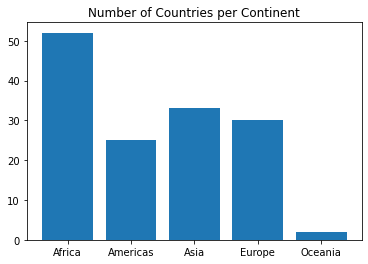

In [28]:
plt.bar([0,1,2,3,4], y)

plt.title('Number of Countries per Continent')
plt.xticks(range(n_continents), continents);


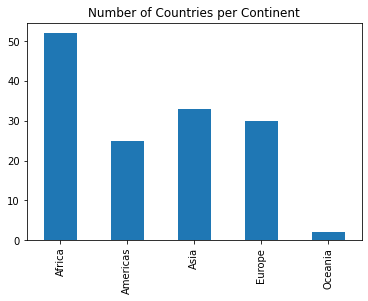

In [29]:
# Option 1
y.plot(kind='bar', title='Number of Countries per Continent')
plt.xticks(range(n_continents), continents);

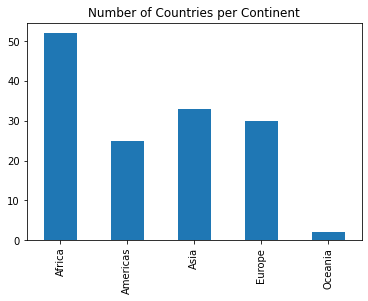

In [30]:
# Option 2
ax = y.plot(kind='bar',
            title='Number of Countries per Continent',
            xticks=range(n_continents))
ax.set_xticklabels(continents);

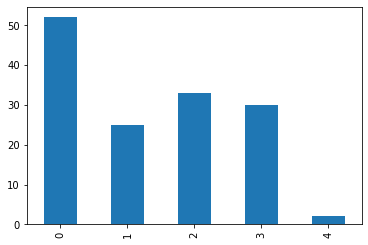

In [31]:
y.plot(kind='bar')

In [32]:
# Get the countries in Oceania in 2007
gm_latest_oceania = gm_latest[gm_latest['continent']=='Oceania']

In [33]:
continent_gdp_latest = []
for c in continents:
    gm_latest_cur_cont = gm_latest[gm_latest['continent'] == c]
    cur_gdp_vals = gm_latest_cur_cont['gdpPercap'].values
    continent_gdp_latest.append(cur_gdp_vals)

In [34]:
continent_gdp_latest

[array([ 6223.367465 ,  4797.231267 ,  1441.284873 , 12569.85177  ,
         1217.032994 ,   430.0706916,  2042.09524  ,   706.016537 ,
         1704.063724 ,   986.1478792,   277.5518587,  3632.557798 ,
         1544.750112 ,  2082.481567 ,  5581.180998 , 12154.08975  ,
          641.3695236,   690.8055759, 13206.48452  ,   752.7497265,
         1327.60891  ,   942.6542111,   579.231743 ,  1463.249282 ,
         1569.331442 ,   414.5073415, 12057.49928  ,  1044.770126 ,
          759.3499101,  1042.581557 ,  1803.151496 , 10956.99112  ,
         3820.17523  ,   823.6856205,  4811.060429 ,   619.6768924,
         2013.977305 ,  7670.122558 ,   863.0884639,  1598.435089 ,
         1712.472136 ,   862.5407561,   926.1410683,  9269.657808 ,
         2602.394995 ,  4513.480643 ,  1107.482182 ,   882.9699438,
         7092.923025 ,  1056.380121 ,  1271.211593 ,   469.7092981]),
 array([12779.37964 ,  3822.137084,  9065.800825, 36319.23501 ,
        13171.63885 ,  7006.580419,  9645.06142 , 

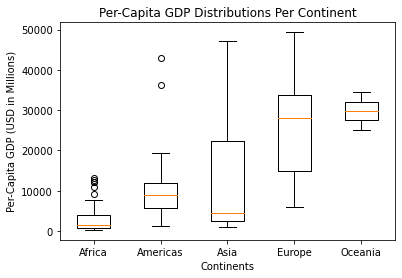

In [35]:
plt.boxplot(continent_gdp_latest)
plt.title('Per-Capita GDP Distributions Per Continent')
plt.xlabel('Continents')
plt.ylabel('Per-Capita GDP (USD in Millions)');
plt.xticks(range(1,len(continents)+1), continents);

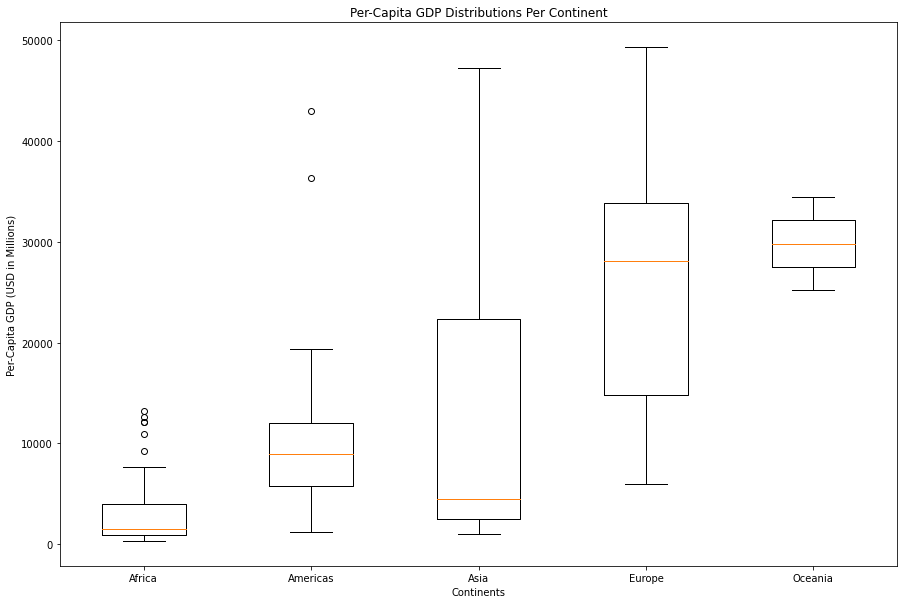

In [36]:
plt.figure(figsize=(15,10))
plt.boxplot(continent_gdp_latest)
plt.title('Per-Capita GDP Distributions Per Continent')
plt.xlabel('Continents')
plt.ylabel('Per-Capita GDP (USD in Millions)');
plt.xticks(range(1,len(continents)+1), continents);

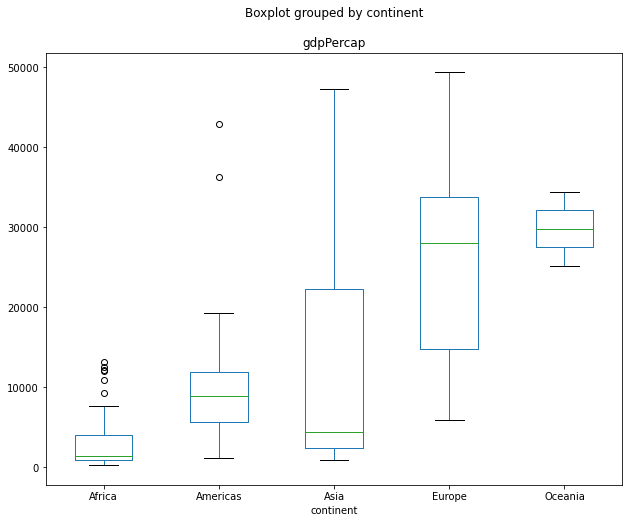

In [37]:
gm_latest.boxplot(column='gdpPercap', by='continent', grid=False, figsize=(10,8));

In [40]:
portugal = gm[gm['country'] == 'Portugal']

portugal.head()

,country,continent,year,lifeExp,pop,gdpPercap
1236,Portugal,Europe,1952,59.82,8526050.0,3068.319867
1237,Portugal,Europe,1957,61.51,8817650.0,3774.571743
1238,Portugal,Europe,1962,64.39,9019800.0,4727.954889
1239,Portugal,Europe,1967,66.60,9103000.0,6361.517993
1240,Portugal,Europe,1972,69.26,8970450.0,9022.247417


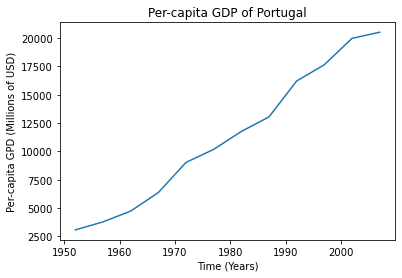

In [41]:
plt.plot(portugal['year'], portugal['gdpPercap'])
plt.title('Per-capita GDP of Portugal')
plt.xlabel('Time (Years)')
plt.ylabel('Per-capita GPD (Millions of USD)');

In [42]:
spain = gm[gm['country'] == 'Spain']

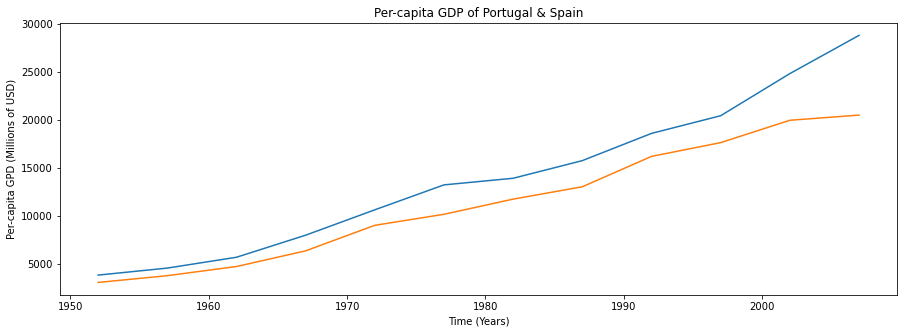

In [43]:
plt.figure(figsize=(15,5))
plt.plot(spain['year'], spain['gdpPercap'])
plt.plot(portugal['year'], portugal['gdpPercap'])
plt.title('Per-capita GDP of Portugal & Spain')
plt.xlabel('Time (Years)')
plt.ylabel('Per-capita GPD (Millions of USD)');

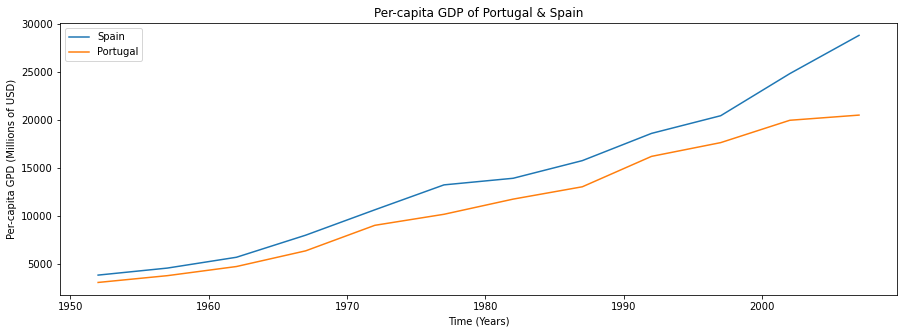

In [44]:
plt.figure(figsize=(15,5))
plt.plot(spain['year'], spain['gdpPercap'], label='Spain')
plt.plot(portugal['year'], portugal['gdpPercap'], label='Portugal')
plt.title('Per-capita GDP of Portugal & Spain')
plt.xlabel('Time (Years)')
plt.ylabel('Per-capita GPD (Millions of USD)')
plt.legend();

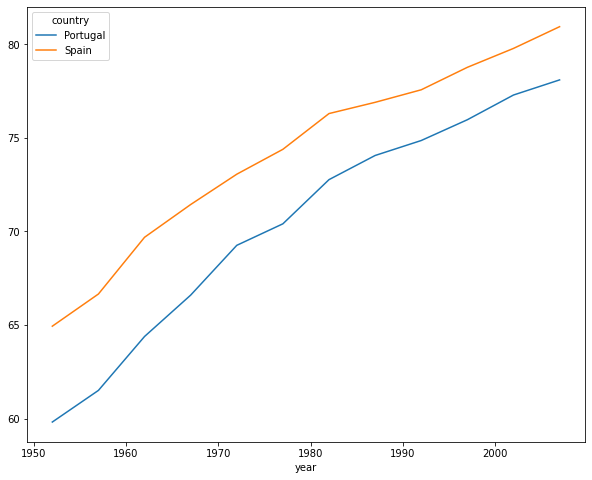

In [46]:
gm[gm.country.isin(['Spain', 'Portugal'])].pivot(index='year', 
                                                 values='lifeExp', 
                                                 columns='country').plot(figsize=(10,8))

Text(0, 0.5, 'Life Expectency (years)')

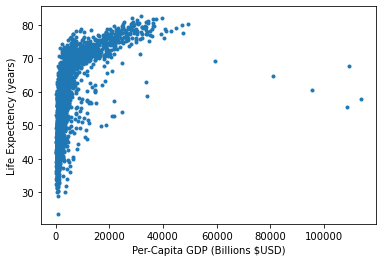

In [47]:
plt.scatter(gm['gdpPercap'], gm['lifeExp'], marker='.')
plt.xlabel('Per-Capita GDP (Billions $USD)')
plt.ylabel('Life Expectency (years)')

Text(0, 0.5, 'Life Expectency (years)')

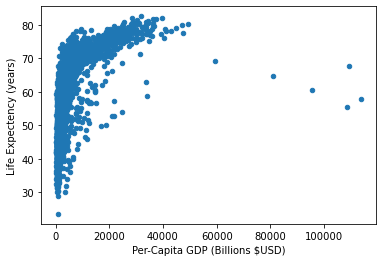

In [48]:
gm.plot(x='gdpPercap', y='lifeExp', kind='scatter')
plt.xlabel('Per-Capita GDP (Billions $USD)')
plt.ylabel('Life Expectency (years)')

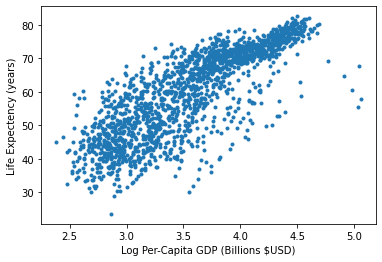

In [49]:
plt.scatter(np.log10(gm['gdpPercap']), gm['lifeExp'], marker='.')
plt.xlabel('Log Per-Capita GDP (Billions $USD)')
plt.ylabel('Life Expectency (years)');

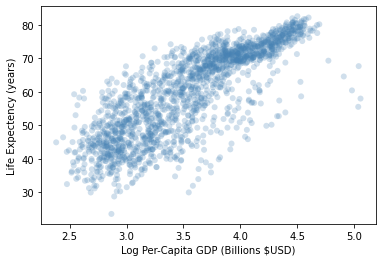

In [50]:
plt.scatter(np.log10(gm['gdpPercap']), 
            gm['lifeExp'], 
            marker='o',
            alpha=0.25,
            facecolor='SteelBlue',
            edgecolor='None')
plt.xlabel('Log Per-Capita GDP (Billions $USD)')
plt.ylabel('Life Expectency (years)');

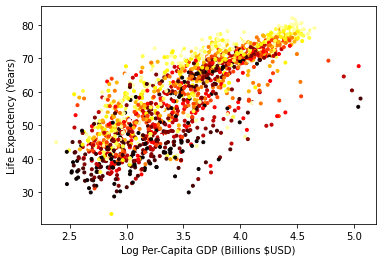

In [51]:
plt.scatter(np.log10(gm['gdpPercap']), gm['lifeExp'], marker='.', c=gm['year'], cmap='hot')
plt.xlabel('Log Per-Capita GDP (Billions $USD)')
plt.ylabel('Life Expectency (Years)');

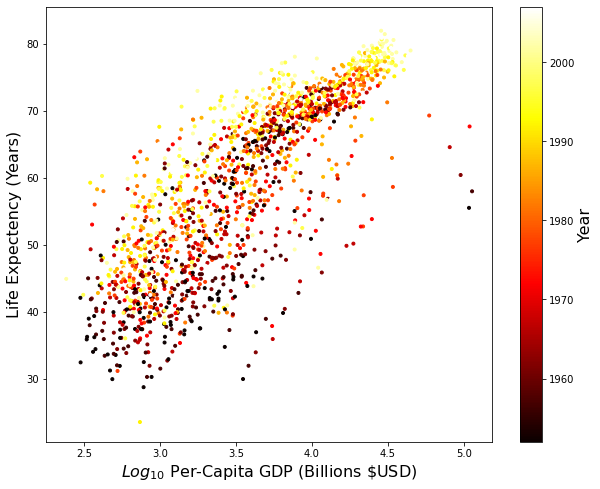

In [52]:
plt.figure(figsize=(10, 8))
plt.scatter(np.log10(gm['gdpPercap']), gm['lifeExp'], marker='.', c=gm['year'], cmap='hot')
plt.xlabel('$Log_{10}$ Per-Capita GDP (Billions \$USD)', fontsize=16)
plt.ylabel('Life Expectency (Years)', fontsize=16)
plt.colorbar().set_label('Year', fontsize=16);

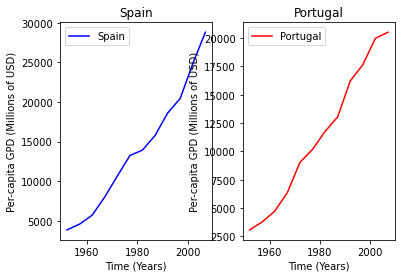

In [53]:
plt.subplot(1,2,1)
plt.plot(spain['year'], spain['gdpPercap'], label='Spain', color='blue')
plt.title('Spain')
plt.xlabel('Time (Years)')
plt.ylabel('Per-capita GPD (Millions of USD)')
plt.legend();

plt.subplot(1,2,2)
plt.plot(portugal['year'], portugal['gdpPercap'], label='Portugal', color='red')
plt.title('Portugal')
plt.xlabel('Time (Years)')
plt.ylabel('Per-capita GPD (Millions of USD)')
plt.legend();

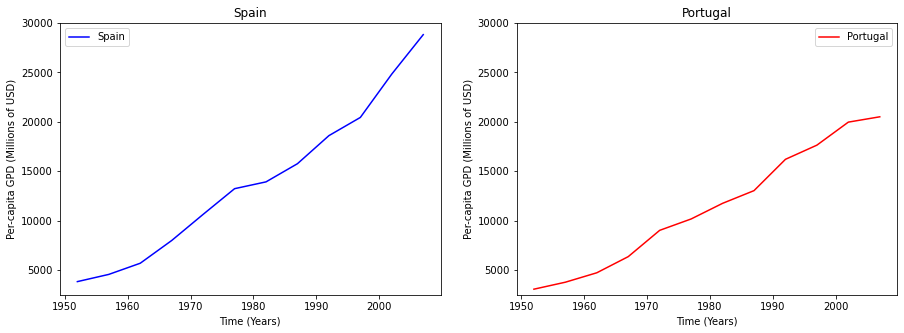

In [55]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(spain['year'], spain['gdpPercap'], label='Spain', color='blue')
plt.title('Spain')
plt.xlabel('Time (Years)')
plt.ylabel('Per-capita GPD (Millions of USD)')
plt.ylim(2500, 30000)
plt.legend();

plt.subplot(1,2,2)
plt.plot(portugal['year'], portugal['gdpPercap'], label='Portugal', color='red')
plt.title('Portugal')
plt.xlabel('Time (Years)')
plt.ylabel('Per-capita GPD (Millions of USD)')
plt.ylim(2500, 30000)
plt.legend();

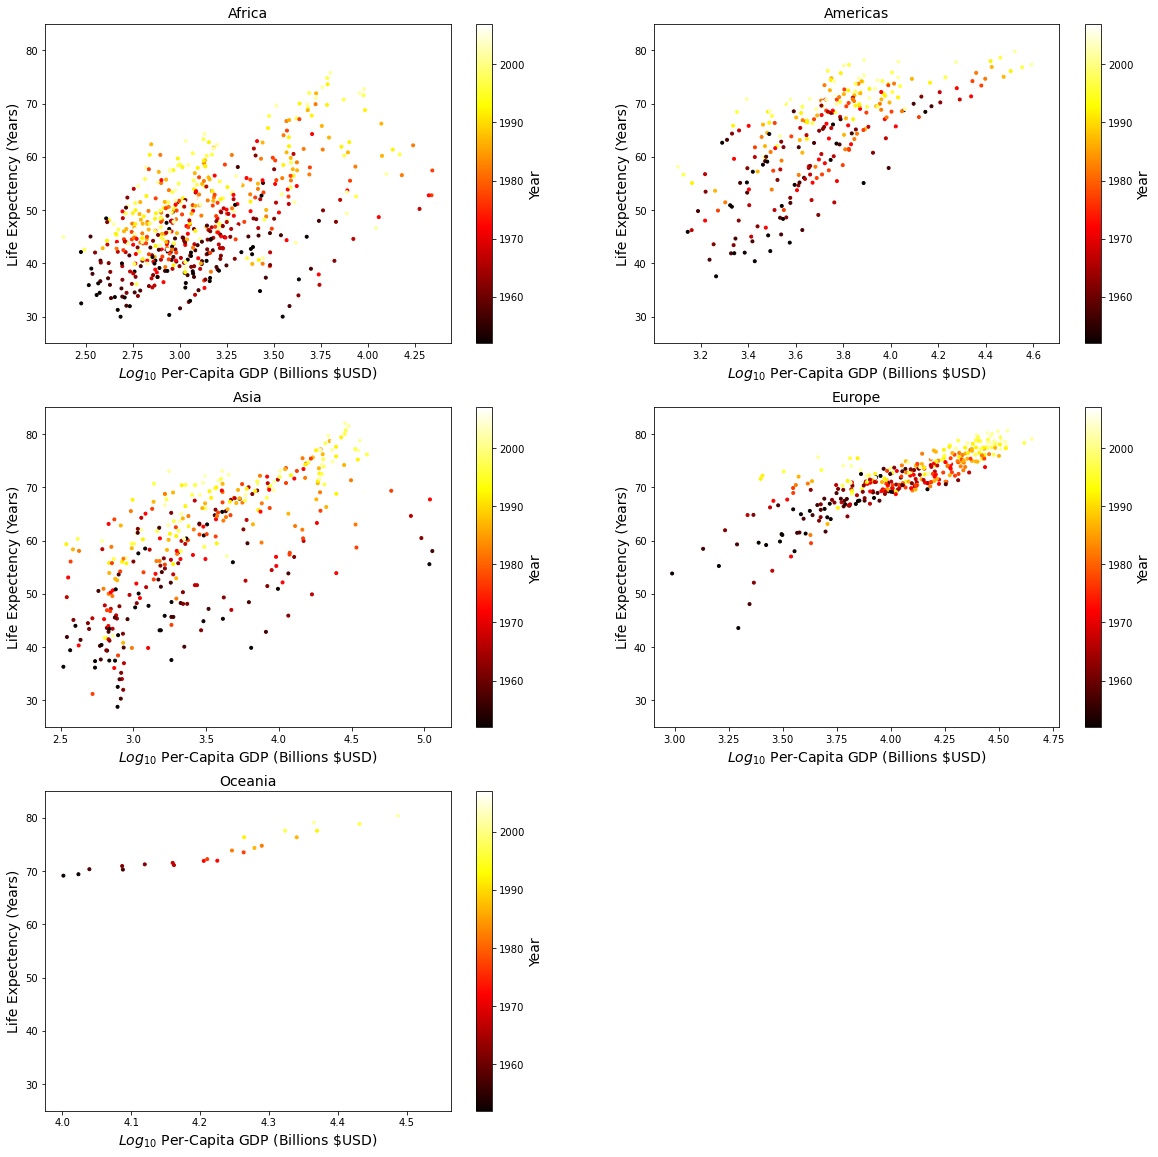

In [56]:
plt.figure(figsize=(20,20))

for i,continent in enumerate(continents):
    # Get a dataframe with just countries in the current continent
    cur_continent_df = gm[gm['continent'] == continent]

    # Set the current subplot
    plt.subplot(3,2,i+1)
    
    # make the current scatter plot 
    plt.scatter(np.log10(cur_continent_df['gdpPercap']), 
                cur_continent_df['lifeExp'], 
                marker='.', 
                c=cur_continent_df['year'], 
                cmap='hot')
    plt.xlabel('$Log_{10}$ Per-Capita GDP (Billions \$USD)', fontsize=14)
    plt.ylabel('Life Expectency (Years)', fontsize=14)
    plt.title(continent, fontsize=14)
    plt.ylim(25,85)
    plt.colorbar().set_label('Year', fontsize=14);

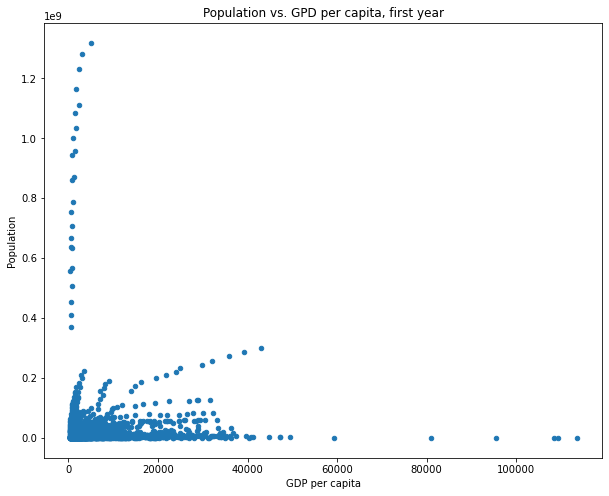

In [57]:
min_yr = gm.year.min()
gm_first_yr = gm[gm.year == min_yr]
gm.plot(x = 'gdpPercap', y='pop', kind='scatter', figsize=(10,8));
plt.xlabel('GDP per capita')
plt.ylabel('Population')
plt.title('Population vs. GPD per capita, first year');

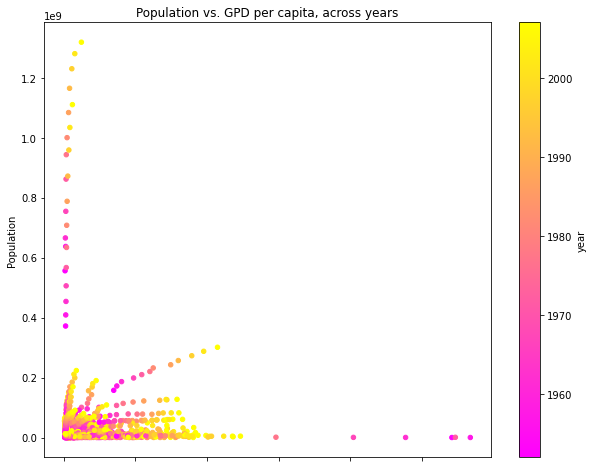

In [58]:
gm.plot(x = 'gdpPercap', y='pop', c='year', cmap='spring', kind='scatter', figsize=(10,8));
plt.xlabel('GDP per capita')
plt.ylabel('Population')
plt.title('Population vs. GPD per capita, across years');

In [59]:
hexsix = np.array(['#ffffcc', '#d9f0a3', '#addd8e', '#78c679', '#31a354', '#006837'])
gm['decade'] = (gm['year'] / 10).astype(int) * 10
decades = gm['decade'].unique()
decades

array([1950, 1960, 1970, 1980, 1990, 2000])

In [60]:
per_continent_mean_gdp = gm.groupby(['continent', 'year'], as_index=False)['gdpPercap'].mean()

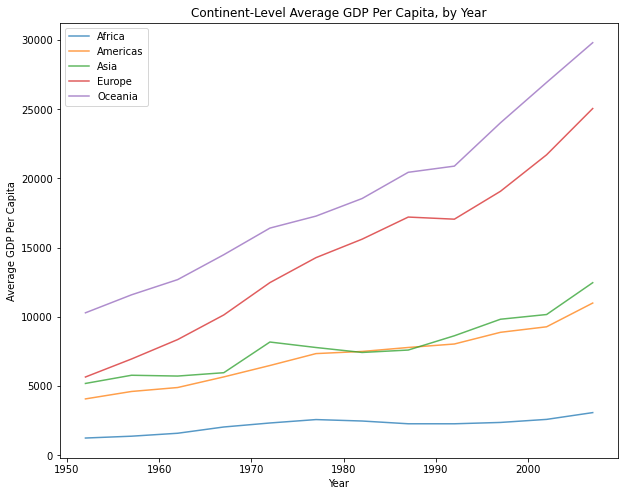

In [61]:
plt.figure(figsize=(10, 8))

for continent in continents:
    cur_continent_df = per_continent_mean_gdp[per_continent_mean_gdp['continent'] == continent]
    plt.plot(cur_continent_df['year'], 
             cur_continent_df['gdpPercap'], 
             alpha=0.75, 
             label=continent)

plt.title('Continent-Level Average GDP Per Capita, by Year')
plt.xlabel('Year')
plt.ylabel('Average GDP Per Capita')
plt.legend(loc='upper left');

In [62]:
params = {'figure.facecolor' : 'white',
          'axes.facecolor' : 'white',
          
          'axes.titlesize' : 'x-large',
          'axes.axisbelow' : True,
          
          'axes.edgecolor' : 'DimGray',
          'axes.linewidth' : 0.5,
          
          'axes.labelsize' : 'large',
          'axes.labelcolor' : '#4A4A4A',
          
          'axes.grid' : True,
          'grid.linestyle' : ':',
          'grid.color' : 'DimGray',
          'grid.alpha' : 0.5,
          
          'xtick.color' : '#4A4A4A',
          'xtick.major.size' : 0,
          'xtick.minor.size' : 0,
          'xtick.labelsize' : 'medium',
          
          'ytick.color' : '#4A4A4A',
          'ytick.major.size' : 0,
          'ytick.minor.size' : 0,
          'ytick.labelsize' : 'medium',
          
          'text.color' : '#4A4A4A',
          
          'legend.fancybox' : False,
          'legend.frameon' : False,
          'legend.fontsize' : 'large'}

In [63]:
for (k, v) in params.items(): # .iteritems() in Python 2.7
    plt.rcParams[k] = v

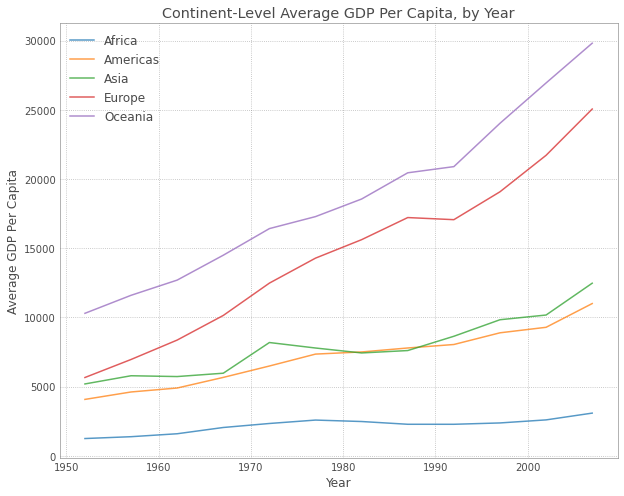

In [64]:
plt.figure(figsize=(10, 8))

for continent in continents:
    cur_continent_df = per_continent_mean_gdp[per_continent_mean_gdp['continent'] == continent]
    plt.plot(cur_continent_df['year'], 
             cur_continent_df['gdpPercap'], 
             alpha=0.75, 
             label=continent)

plt.title('Continent-Level Average GDP Per Capita, by Year')
plt.xlabel('Year')
plt.ylabel('Average GDP Per Capita')
plt.legend(loc='upper left');

In [65]:
plt.style.use('fivethirtyeight')

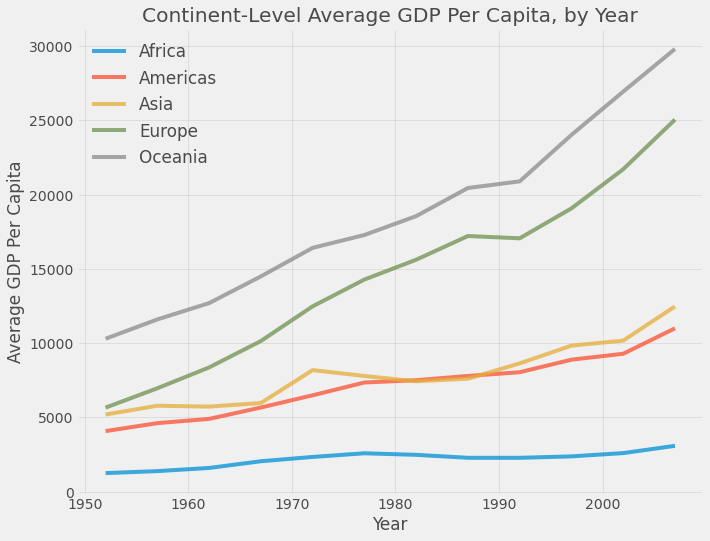

In [66]:
plt.figure(figsize=(10, 8))

for continent in continents:
    cur_continent_df = per_continent_mean_gdp[per_continent_mean_gdp['continent'] == continent]
    plt.plot(cur_continent_df['year'], 
             cur_continent_df['gdpPercap'], 
             alpha=0.75, 
             label=continent)

plt.title('Continent-Level Average GDP Per Capita, by Year')
plt.xlabel('Year')
plt.ylabel('Average GDP Per Capita')
plt.legend(loc='upper left');

In [67]:
import seaborn as sns
sns.set(rc={'axes.facecolor' : '#EEEEEE'})

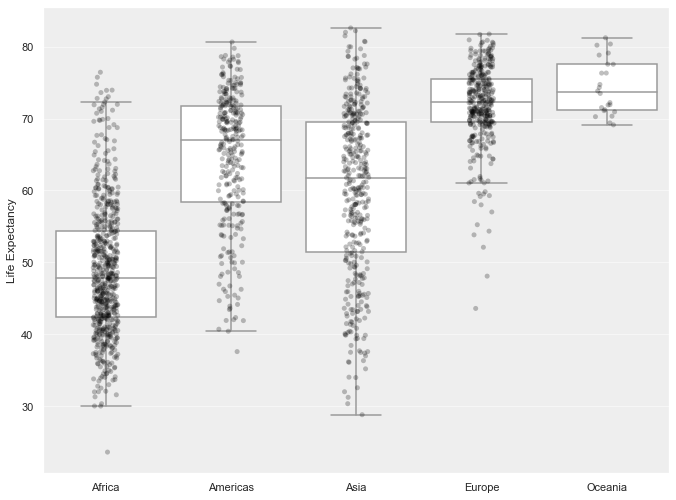

In [68]:

plt.figure(figsize=(10, 8))

sns.boxplot(x="continent", y="lifeExp", data=gm,
            order=np.sort(gm.continent.unique()),
            color='white', fliersize=0)
sns.stripplot(x="continent", y="lifeExp", data=gm,
              order=np.sort(gm.continent.unique()),
              alpha=0.25, size=5, jitter=True,
              color='Black', edgecolor='Black')

plt.xlabel('')
plt.ylabel('Life Expectancy');

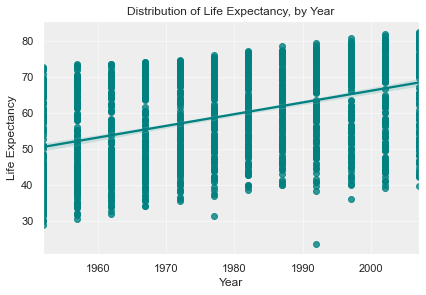

In [69]:

sns.regplot(x='year', y='lifeExp', data=gm, color='teal')

plt.title('Distribution of Life Expectancy, by Year')
plt.xlabel('Year')
plt.ylabel('Life Expectancy');

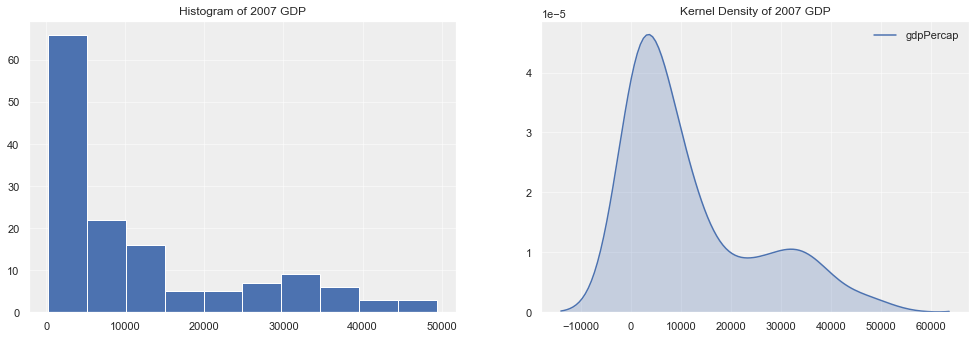

In [70]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(gm_latest['gdpPercap'])
plt.title('Histogram of 2007 GDP')
plt.subplot(1,2,2)
sns.kdeplot(gm_latest['gdpPercap'], shade=True)
plt.title('Kernel Density of 2007 GDP');

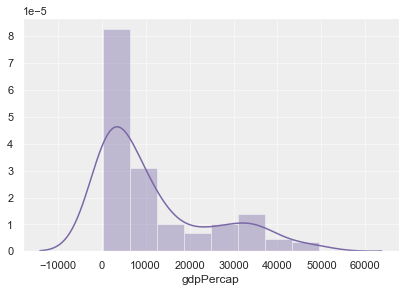

In [72]:
sns.distplot(gm_latest['gdpPercap'], color='#7A68A6')

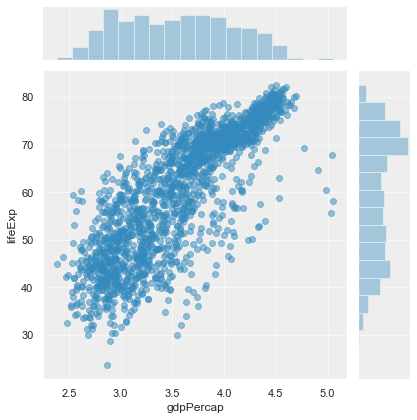

In [73]:
sns.jointplot(np.log10(gm['gdpPercap']), gm['lifeExp'], color="#348ABD", alpha=0.5);

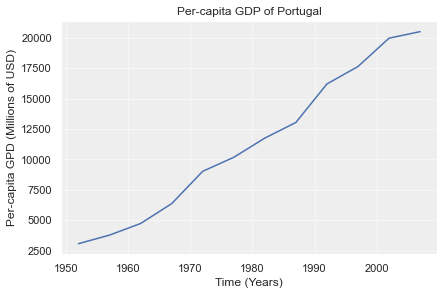

In [74]:
plt.plot(portugal['year'], portugal['gdpPercap'])
plt.title('Per-capita GDP of Portugal')
plt.xlabel('Time (Years)')
plt.ylabel('Per-capita GPD (Millions of USD)');

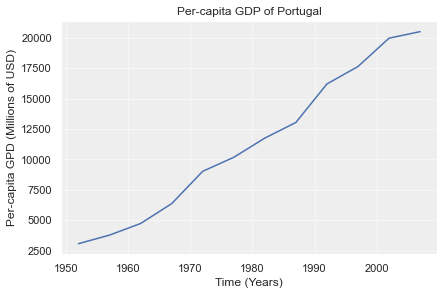

In [75]:
plt.plot(portugal['year'], portugal['gdpPercap'])
plt.title('Per-capita GDP of Portugal')
plt.xlabel('Time (Years)')
plt.ylabel('Per-capita GPD (Millions of USD)');

In [76]:
spain = gm[gm['country'] == 'Spain']

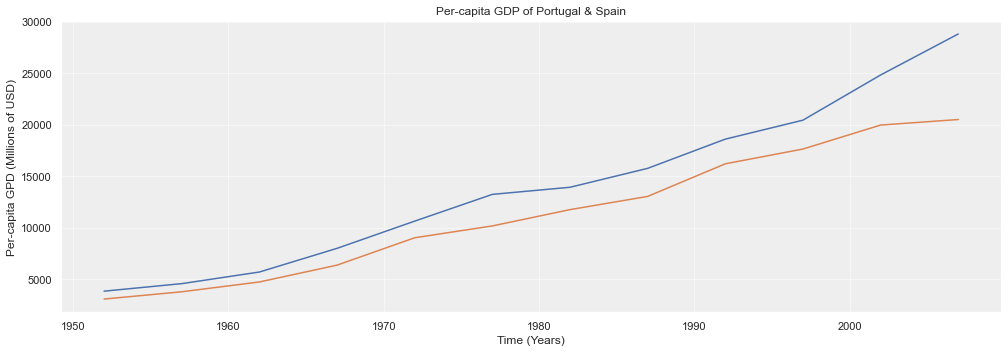

In [77]:
plt.figure(figsize=(15,5))
plt.plot(spain['year'], spain['gdpPercap'])
plt.plot(portugal['year'], portugal['gdpPercap'])
plt.title('Per-capita GDP of Portugal & Spain')
plt.xlabel('Time (Years)')
plt.ylabel('Per-capita GPD (Millions of USD)');

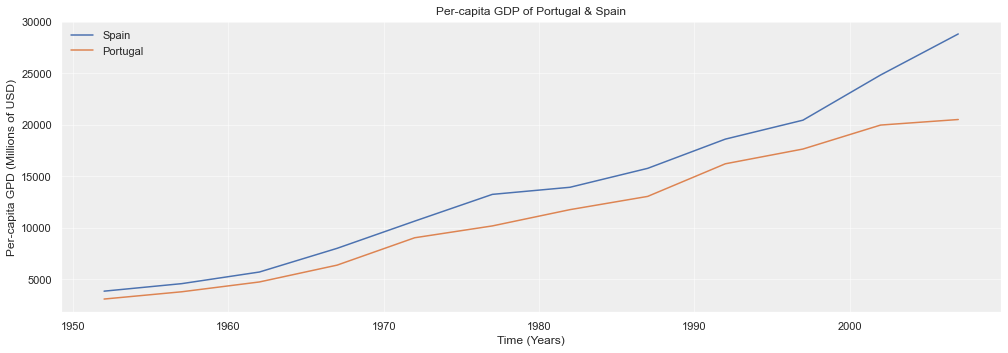

In [78]:
plt.figure(figsize=(15,5))
plt.plot(spain['year'], spain['gdpPercap'], label='Spain')
plt.plot(portugal['year'], portugal['gdpPercap'], label='Portugal')
plt.title('Per-capita GDP of Portugal & Spain')
plt.xlabel('Time (Years)')
plt.ylabel('Per-capita GPD (Millions of USD)')
plt.legend();

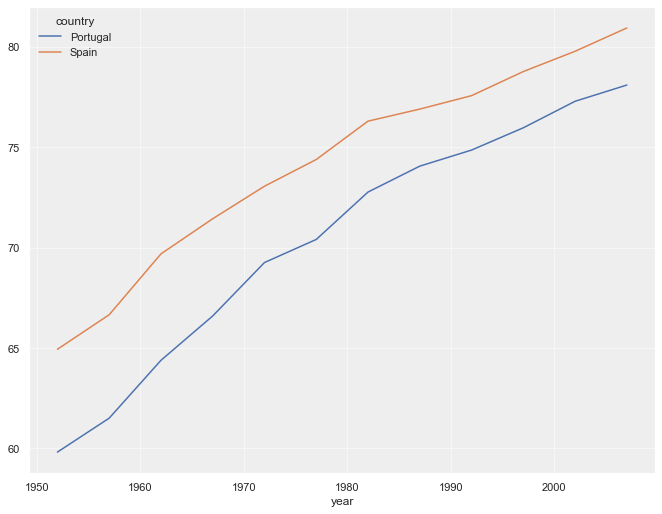

In [79]:
gm[gm.country.isin(['Spain', 'Portugal'])].pivot(index='year', 
                                                 values='lifeExp', 
                                                 columns='country').plot(figsize=(10,8))

Text(0, 0.5, 'Life Expectency (years)')

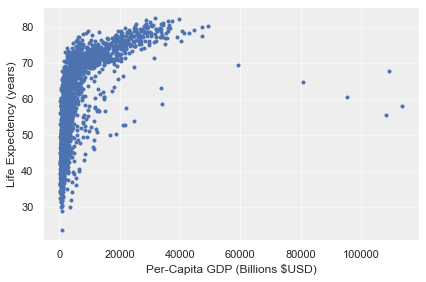

In [80]:
plt.scatter(gm['gdpPercap'], gm['lifeExp'], marker='.')
plt.xlabel('Per-Capita GDP (Billions $USD)')
plt.ylabel('Life Expectency (years)')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'Life Expectency (years)')

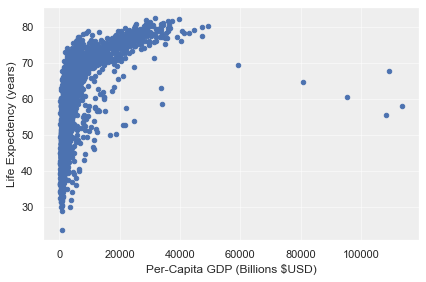

In [82]:
gm.plot(x='gdpPercap', y='lifeExp', kind='scatter')
plt.xlabel('Per-Capita GDP (Billions $USD)')
plt.ylabel('Life Expectency (years)')

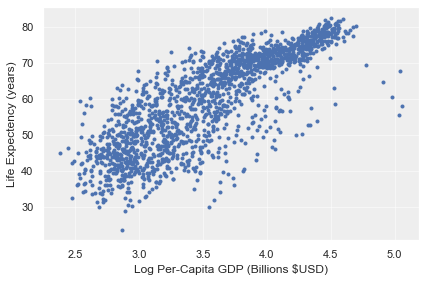

In [83]:
plt.scatter(np.log10(gm['gdpPercap']), gm['lifeExp'], marker='.')
plt.xlabel('Log Per-Capita GDP (Billions $USD)')
plt.ylabel('Life Expectency (years)');

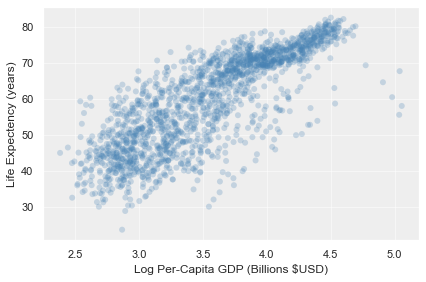

In [84]:
plt.scatter(np.log10(gm['gdpPercap']), 
            gm['lifeExp'], 
            marker='o',
            alpha=0.25,
            facecolor='SteelBlue',
            edgecolor='None')
plt.xlabel('Log Per-Capita GDP (Billions $USD)')
plt.ylabel('Life Expectency (years)');

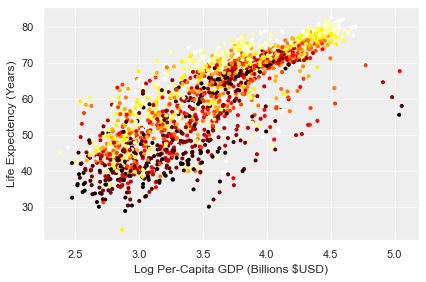

In [85]:
plt.scatter(np.log10(gm['gdpPercap']), gm['lifeExp'], marker='.', c=gm['year'], cmap='hot')
plt.xlabel('Log Per-Capita GDP (Billions $USD)')
plt.ylabel('Life Expectency (Years)');

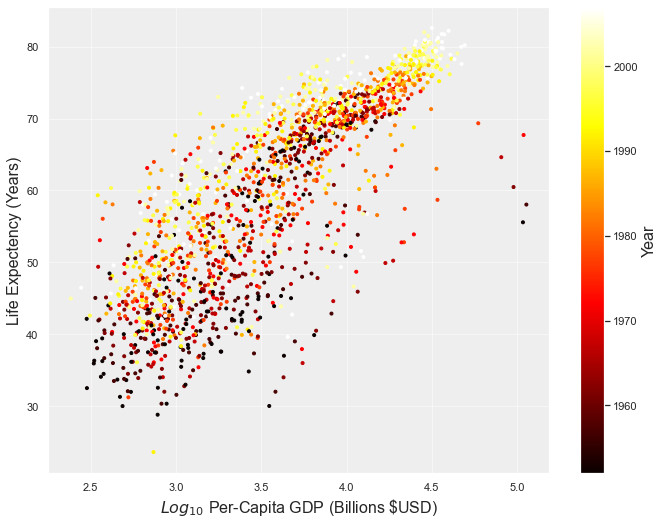

In [86]:
plt.figure(figsize=(10, 8))
plt.scatter(np.log10(gm['gdpPercap']), gm['lifeExp'], marker='.', c=gm['year'], cmap='hot')
plt.xlabel('$Log_{10}$ Per-Capita GDP (Billions \$USD)', fontsize=16)
plt.ylabel('Life Expectency (Years)', fontsize=16)
plt.colorbar().set_label('Year', fontsize=16);

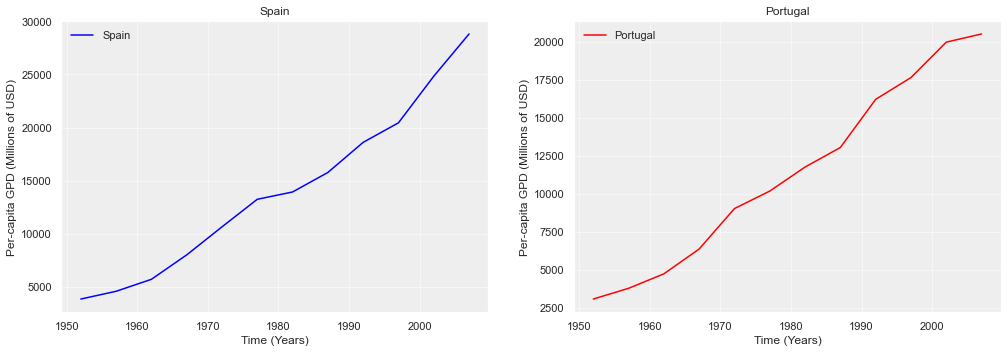

In [87]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(spain['year'], spain['gdpPercap'], label='Spain', color='blue')
plt.title('Spain')
plt.xlabel('Time (Years)')
plt.ylabel('Per-capita GPD (Millions of USD)')
plt.legend();

plt.subplot(1,2,2)
plt.plot(portugal['year'], portugal['gdpPercap'], label='Portugal', color='red')
plt.title('Portugal')
plt.xlabel('Time (Years)')
plt.ylabel('Per-capita GPD (Millions of USD)')
plt.legend();

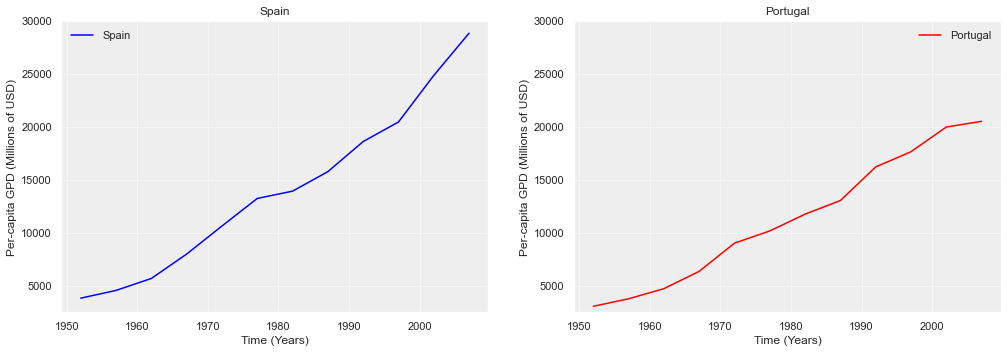

In [88]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(spain['year'], spain['gdpPercap'], label='Spain', color='blue')
plt.title('Spain')
plt.xlabel('Time (Years)')
plt.ylabel('Per-capita GPD (Millions of USD)')
plt.ylim(2500, 30000)
plt.legend();

plt.subplot(1,2,2)
plt.plot(portugal['year'], portugal['gdpPercap'], label='Portugal', color='red')
plt.title('Portugal')
plt.xlabel('Time (Years)')
plt.ylabel('Per-capita GPD (Millions of USD)')
plt.ylim(2500, 30000)
plt.legend();